In [1]:
import datetime
import sqlite3
import time
import random
import matplotlib.pyplot as plot

%matplotlib notebook

connected =  sqlite3.Connection('dbgtp.db')
cr = connected.cursor()

def create_table_new():
    cr.execute('CREATE TABLE IF NOT EXISTS product (id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
    'prod_name TEXT, valor REAL)')
   
def data_insert():
    cr.execute("INSERT INTO product VALUES (10,'2016-05--02 14:32:11', 'Teclado', 90)")
    connected.commit()
    cr.close()
    connected.close()

def data_insert_var():
    new_date = datetime.datetime.now()
    new_prod_name = 'Monitor'
    new_valor = random.randrange(50,100)
    cr.execute("INSERT INTO product (date, prod_name, valor) VALUES (?, ?, ?)",( new_date, new_prod_name, new_valor))
    connected.commit()
    
create_table_new()
data_insert_var()

for i in range(10):
    data_insert_var()
    time.sleep(1)

def leitura_todos_dados():
    cr.execute("SELECT * FROM PRODUCT")
    for linha in cr.fetchall():
        print(linha)

def leitura_registros():
    cr.execute("SELECT * FROM product WHERE valor > 60.0")
    for linha in cr.fetchall():
        print(linha)

def leira_colunas():
    cr.execute("SELECT * FROM  product")
    for linha in cr.fetchall():
        print(linha[3])

In [4]:
def dados_grafico():
    cr.execute("SELECT  ID, VALOR FROM product")
    ids = []
    valores = []
    dados = cr.fetchall()
    for linha in dados:
        ids.append(linha[0])
        valores.append(linha[1])
    
    plot.bar(ids, valores)
    plot.show()


<IPython.core.display.Javascript object>


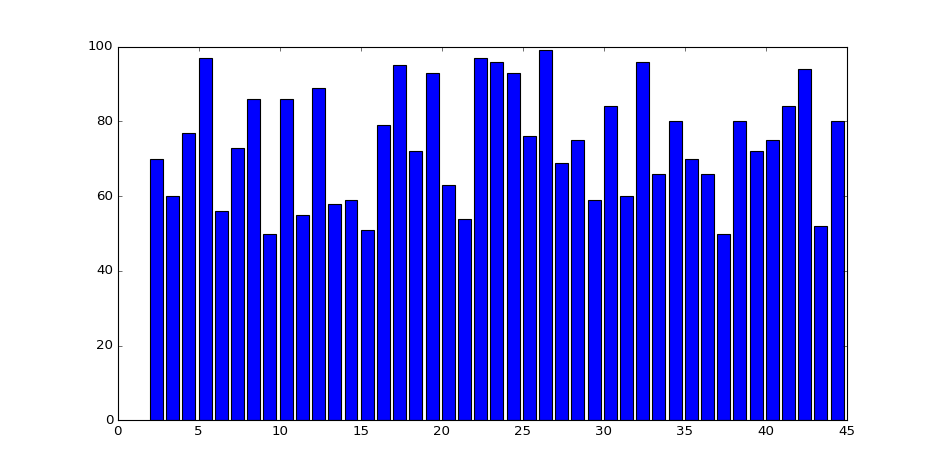

In [5]:
dados_grafico()
